A short notebook to examine the KROSS catalog data

In [1]:
import numpy as np
import fitsio
from astropy.table import Table
import matplotlib.pyplot as plt

%matplotlib inline

## Newer, v2 catalog
This is the second release of the catalogue associated with Johnson et al. 2018 and Harrison et al. 2017. This catalog is the same as the v1 catalog but also contains the observed and derived quantities from the Johnson et al. (2018) and Harrison et al. (2017). This catalogue contains information about the 586 H-alpha detected targets: source names; positions; magnitudes; stellar masses; continuum sizes; H-alpha luminosities, fluxes and redshifts; star-formation rates; rotational velocities; inclination angles; position angles (morphological and kinematic); angular momentum measurements, observed and beam-smearing corrected velocity dispersions (and associated flags), and the inferred Toomre Q, along with various data quality flags. For a full description see Appendix~A in Harrison et al. and Johnson et al. (2018).

In [7]:
kross_file = '/Users/sweveret/repos/kl-tools/data/kross_release_v2.fits'
kross = Table.read(kross_file)
print(f'len: {len(kross)}')
print(kross.colnames)

len: 586
['KID', 'NAME', 'RA', 'DEC', 'K_AB', 'R_AB', 'Z_AB', 'MH', 'MASS', 'VDW12_N', 'IM_TYPE', 'QUALITY_FLAG', 'PA_IM', 'R_IM', 'R_IM_ERR', 'R_FLAG', 'B_O_A', 'THETA_IM', 'THETA_IM_ERR', 'THETA_FLAG', 'Z', 'F_HA', 'L_HA', 'SFR', 'SIGMA_TOT', 'AGN_FLAG', 'IRR_FLAG', 'VEL_PA', 'V22_OBS', 'V22', 'VC_OBS', 'VC', 'VC_ERR_L', 'VC_ERR_H', 'EXTRAP_FLAG', 'KIN_TYPE', 'JS', 'JS_ERR_LOW', 'JS_ERR_HIGH', 'JN', 'SIGMA0_OBS', 'SIGMA0_OBS_ERR', 'SIGMA0', 'SIGMA0_ERR', 'SIGMA0_FLAG', 'RD_RPSF', 'RD_RPSF_ERR', 'Q_g', 'Q_g_ERR_HIGH', 'Q_g_ERR_LOW']


## Older, v1 catalog

This is the full version of Table A1 in Tiley et al. (2018; ArXiv: 1810.07202) and contains the KROSS and SAMI survey catalogs, galaxy ID, log(V2.2), Stellar Mass, M_K, and sample flags.

In [8]:
old_file = '/Users/sweveret/repos/kl-tools/data/TILEY_18_SAMIKROSS_TFR_V1.fits'
old = Table.read(old_file)
print(f'len: {len(old)}')
print(old.colnames)

len: 754
['Survey', 'ID', 'disky', 'logv2.2', 'dlogv2.2', 'mass', 'dmass', 'MK', 'dMK']


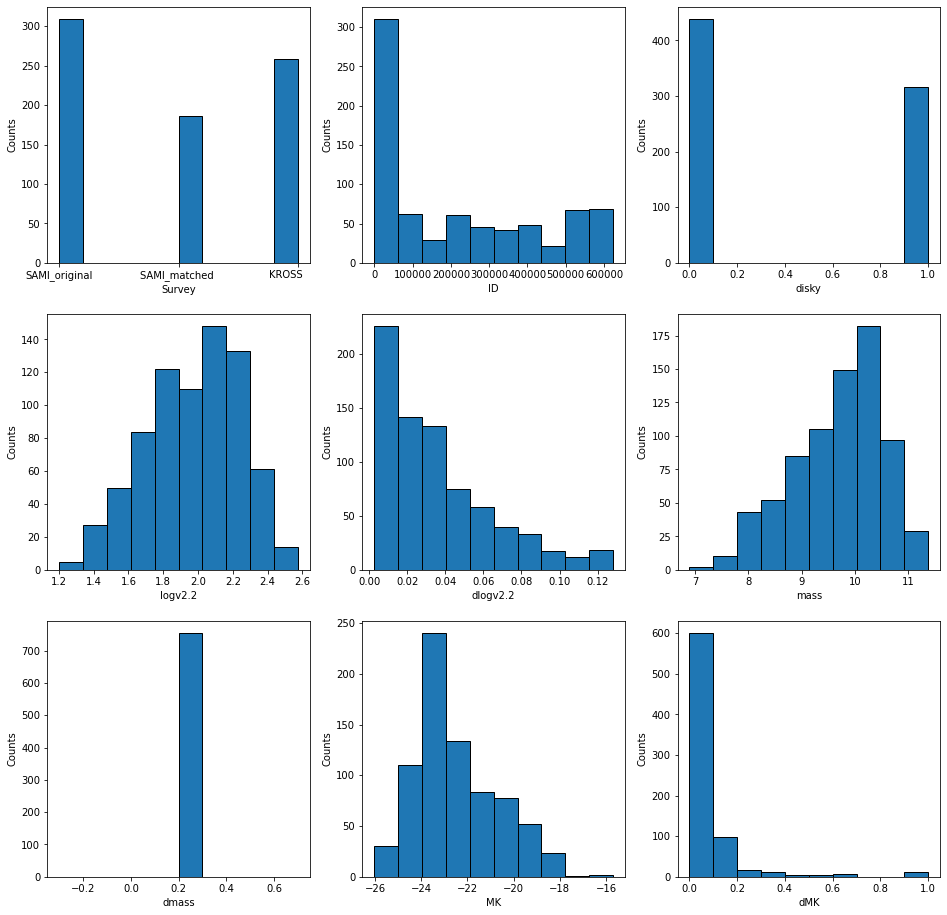

In [13]:
cols = old.colnames

N = int(np.ceil(np.sqrt(len(cols))))

fig, axes = plt.subplots(nrows=N, ncols=N)

for k, col in enumerate(cols):
    ax = axes[k//N, k%N]
    ax.hist(old[col], ec='k')
    ax.set_xlabel(col)
    ax.set_ylabel('Counts')
fig.set_size_inches(16,16)

In [17]:
len(np.where(old['Survey']=='KROSS')[0])

0

In [28]:
len(np.where((old['Survey']=='KROSS        ') |
         (old['Survey']=='SAMI_matched '))[0]
   )

445

In [19]:
old['Survey']

SAMI_original
SAMI_original
SAMI_original
SAMI_original
SAMI_original
SAMI_original
SAMI_original
SAMI_original
SAMI_original
SAMI_original
SAMI_original


In [24]:
old['Survey'][400]

'SAMI_matched '